# $$Análises~de~Correspondências~Múltiplas~(ACM)$$

## $$Conceito$$

- Técnica não supervisionada(Diagnostica), que visa a redução de dimensão da base de dados


- Trabalhar com dados que se manifestam de forma qualitativa


- Quando o número de variáveis de interesse for igual a 2, utilizaremos as Análises de Correspondências Simples (ANACOR); por outro lado, quando o número de variáveis de interesse for maior do que 2, utilizaremos as Análises de Correspondências Múltiplas (ACM)


- A ideia, portanto, é a de se estudar as relações de interdependência em razão das associações entre as categorias das variáveis de interesse, O grande objetivo das Análises de Correspondências é o estabelecimento de um mapa perceptual. O mapa perceptual é uma espécie de gráfico que utilizará coordenadas que representarão as linhas e as colunas de uma tabela de contingências.


- Conseguimos extrair dados métricos de uma variável categórica usando analise de correspondência


In [1]:
#Pacotes
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt

# Banco de dados 

In [2]:
#Base de dados
dados = pd.read_csv('perfil_investidor2.csv',encoding='latin-1')
dados = dados.set_index('estudante')
dados

,perfil,aplicacao,estado_civil
estudante,,,
Gabriela,Conservador,Poupanca,Casado
Luiz Felipe,Conservador,Poupanca,Casado
Patrícia,Conservador,Poupanca,Casado
Gustavo,Conservador,Poupanca,Solteiro
Letícia,Conservador,Poupanca,Casado
...,...,...,...
Sheila,Agressivo,Acoes,Solteiro
Pedro,Agressivo,Acoes,Solteiro
Horácio,Agressivo,Acoes,Solteiro


**Tabela com 100 observações e 3 variáveis**

In [3]:
#Labels
print(dados.perfil.unique())
print(dados.aplicacao.unique())
print(dados.estado_civil.unique())



['Conservador' 'Moderado' 'Agressivo']
['Poupanca' 'CDB' 'Acoes']
['Casado' 'Solteiro']


**Nome das labels de cada variável**

In [4]:
#Frequência das labels na variável perfil
dados.perfil.value_counts()

Agressivo      58
Moderado       25
Conservador    17
Name: perfil, dtype: int64

In [5]:
#Frequência das labels na variável aplicacao
dados.aplicacao.value_counts()

Acoes       45
CDB         40
Poupanca    15
Name: aplicacao, dtype: int64

In [6]:
#Frequência das labels na variável estado_civil
dados.estado_civil.value_counts()

Solteiro    57
Casado      43
Name: estado_civil, dtype: int64

## Tabela de Contingências 

**Na ACM não há como se estabelecer uma única tabela de contingência que abranja todas as variáveis presentes na base de dados, temos que criar as tabelas de contingencias de duas em duas e fazer o estudo do Qui-Quadrado de cada tabela**

In [7]:
# Perfil x Aplicação
tab_cont_PA = pd.crosstab(dados.perfil,dados.aplicacao,margins=True)
tab_cont_PA

aplicacao,Acoes,CDB,Poupanca,All
perfil,,,,
Agressivo,36,20,2,58
Conservador,5,4,8,17
Moderado,4,16,5,25
All,45,40,15,100


In [8]:
# Perfil x Estado Civil
tab_cont_PE = pd.crosstab(dados.perfil,dados.estado_civil,margins=True)
tab_cont_PE

estado_civil,Casado,Solteiro,All
perfil,,,
Agressivo,17,41,58
Conservador,12,5,17
Moderado,14,11,25
All,43,57,100


In [9]:
# Aplicação x Estado Civil
tab_cont_AE = pd.crosstab(dados.aplicacao,dados.estado_civil,margins=True)
tab_cont_AE

estado_civil,Casado,Solteiro,All
aplicacao,,,
Acoes,9,36,45
CDB,24,16,40
Poupanca,10,5,15
All,43,57,100


**Construímos uma tabela de contingência para todos os pares de variáveis do dataset**

## Estudo do Qui-Quadrado de cada tabela de contingências

**Para o estudo das associações entre as categorias das variáveis, utilizaremos dois instrumentos: o Teste 𝜒2**


- O **Teste 𝜒2** estudará se as associações entre as categorias das variáveis se associam, ou não, de forma aleatória, caso o p_valor seja < 0.05, rejeitamos a hipótese nula que diz que as duas variáveis categóricas se associam de forma aleatória e pelo menos 1 categoria se mostrará associada com outra


- Logo, deveremos estabelecer uma matriz de valores esperados e, a seguir, uma matriz de resíduos – isso bastará para o Teste 𝜒2



In [10]:
#Teste chi² (Perfil x Aplicação)
chi2, pvalor, graus_liberdade, valores_esperados = stats.chi2_contingency(tab_cont_PA)
pvalor

0.0002187073702990959

**P_Valor < 0.05, portanto rejeita H0, as variáveis categóricas não se associam de forma aleatória, tem ACM entre as variáveis Perfil e Aplicação**

In [11]:
#Teste chi² (Perfil x Estado Civil)
chi2, pvalor, graus_liberdade, valores_esperados = stats.chi2_contingency(tab_cont_PE)
pvalor

0.07575848845254271

**P_Valor < 0.05, portanto rejeita H0, as variáveis categóricas não se associam de forma aleatória, tem ACM entre as variáveis Perfil e Estado Civil**

In [12]:
#Teste chi² (Aplicação x Estado Civil)
chi2, pvalor, graus_liberdade, valores_esperados = stats.chi2_contingency(tab_cont_AE)
pvalor

0.006600580473427465

**P_Valor < 0.05, portanto rejeita H0, as variáveis categóricas não se associam de forma aleatória, tem ACM entre as variáveis Aplicação e Estado Civil**

**Como todas as variáveis tem associação com pelo menos 1 categoria de outra variável, não vamos excluir nenhuma variável do dataset**

# Matriz Binária(Z) 

**Matriz Binária(Z) se assemelha a tabela de contingencia de uma ANACOR, sendo agora a matéria prima da ACM, com ela conseguimos extrair as coordenadas(consideradas variáveis metricas) das observações e das variáveis, sendo assim , podemos estudar associações entre categorias e observações das variáveis**

In [13]:
#Matriz Binária(Z)
matriz_binaria = pd.get_dummies(dados)
matriz_binaria

,perfil_Agressivo,perfil_Conservador,perfil_Moderado,aplicacao_Acoes,aplicacao_CDB,aplicacao_Poupanca,estado_civil_Casado,estado_civil_Solteiro
estudante,,,,,,,,
Gabriela,0,1,0,0,0,1,1,0
Luiz Felipe,0,1,0,0,0,1,1,0
Patrícia,0,1,0,0,0,1,1,0
Gustavo,0,1,0,0,0,1,0,1
Letícia,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
Sheila,1,0,0,1,0,0,0,1
Pedro,1,0,0,1,0,0,0,1
Horácio,1,0,0,1,0,0,0,1


# Matriz de Burt 

**Parecido com a Matriz Binária(Z), porém não captura as coordenadas das observações, mas possui uma grande vantagem se sua intenção for estudar as coordenadas das categorias, pois a matriz de Burt consegue capturar mais da inercia principal total**

In [14]:
# Matriz de Burt
Matriz_Burt = pd.DataFrame(np.dot(matriz_binaria.T,matriz_binaria),columns=matriz_binaria.columns)
Matriz_Burt.index = Matriz_Burt.columns
Matriz_Burt

,perfil_Agressivo,perfil_Conservador,perfil_Moderado,aplicacao_Acoes,aplicacao_CDB,aplicacao_Poupanca,estado_civil_Casado,estado_civil_Solteiro
perfil_Agressivo,58,0,0,36,20,2,17,41
perfil_Conservador,0,17,0,5,4,8,12,5
perfil_Moderado,0,0,25,4,16,5,14,11
aplicacao_Acoes,36,5,4,45,0,0,9,36
aplicacao_CDB,20,4,16,0,40,0,24,16
aplicacao_Poupanca,2,8,5,0,0,15,10,5
estado_civil_Casado,17,12,14,9,24,10,43,0
estado_civil_Solteiro,41,5,11,36,16,5,0,57


**A matriz de burt é a matriz binaria pela sua transposta, note que as colunas e as linhas são as mesmas**

## Decomposição da Inércia Principal Total na ACM

### **Formula:**
    
- **J = N° Total de Categorias**


- **Q = N° Total de Variáveis**
    
    
- **Inércia Principal Total = (J - Q) / Q**

In [15]:
#Decomposição da inércia principal total 

J = len(Matriz_Burt) #Numero de categorias
Q = len(dados.columns) #Numero de Variáveis
IPT = (J-Q)/Q

print(f'Incercia Principal Total: {IPT}')

Incercia Principal Total: 1.6666666666666667


**Valor da Inércia Principal Total**

## Determinar o número máximo de Eigenvalues para a Decomposição Inercial

### **Formula:**
    
- **J = N° Total de Categorias**


- **Q = N° Total de Variáveis**

In [40]:
#Numero de Eigenvalues
J = len(Matriz_Burt) #Numero de categorias
Q = len(dados.columns) #Numero de Variáveis
N_Eigenvalues = J-Q

print(f'Número máximo de Eigenvalues: {N_Eigenvalues}')

Número máximo de Eigenvalues: 5


## Criando o modelo ACM com o Algoritimo prince.CA

In [30]:
# Criando o modelo ACM com a Matriz Burt
import prince


# Num. de dimensões necessarias para analise
J = len(Matriz_Burt.columns)
Q = len(dados.columns)
dim = J - Q

#Modelo
IPT_Burt = prince.CA(n_components=dim)
IPT_Burt.fit(Matriz_Burt);

# Eigenvalues da Matriz de burt
np.array(IPT_Burt.eigenvalues_)

array([0.36277072, 0.19008538, 0.07643719, 0.03234137, 0.02960619])

**Eigenvalues da Matriz de burt**

In [31]:
# Porcentagem  de cada Eigenvalues da Matriz de burt
np.divide(IPT_Burt.eigenvalues_,sum(IPT_Burt.eigenvalues_))


array([0.52481088, 0.27499153, 0.11057967, 0.04678741, 0.0428305 ])

**Porcentagem  de cada Eigenvalues da Matriz de Burt**

In [33]:
# Criando o modelo ACM com a Matriz Binaria

# Num. de dimensões necessarias para analise
J = len(matriz_binaria.columns)
Q = len(dados.columns)
dim = J - Q

#Modelo
IPT_binaria = prince.CA(n_components=dim)
IPT_binaria.fit(matriz_binaria);

# Eigenvalues da Matriz Binaria
np.array(IPT_binaria.eigenvalues_)

array([0.60230451, 0.43598782, 0.27647276, 0.17983707, 0.1720645 ])

**Eigenvalues da Matriz Binaria**

In [32]:
#Inercia principal total da matriz Binaria decomposta
np.divide(IPT_binaria.eigenvalues_,sum(IPT_binaria.eigenvalues_))

array([0.36138271, 0.26159269, 0.16588365, 0.10790224, 0.1032387 ])

**Porcentagem  de cada Eigenvalues da Matriz Binaria**

**OBS: Comprovamos que as duas primeiras dimensões da Matriz de Burt captura mais da inercia principal total do que a Matriz Binaria**

In [39]:
# Eigenvalues da Matriz de burt
print(f'Eigenvalues Matriz de Burts: {np.array(IPT_Burt.eigenvalues_)}\n')

# Eigenvalues da Matriz de burt
print(f'Eigenvalues Matriz de Binaria: {np.array(IPT_binaria.eigenvalues_)}\n')

Eigenvalues Matriz de Burts: [0.36277072 0.19008538 0.07643719 0.03234137 0.02960619]

Eigenvalues Matriz de Binaria: [0.60230451 0.43598782 0.27647276 0.17983707 0.1720645 ]



**Percebemos que os Eigenvalues da matriz binaria é a raiz quadrada dos Eigenvalues da matriz de Burt**

In [19]:
# Inercia Principal Total
sum_autovalores = sum(IPT_binaria.eigenvalues_)
print(f'Soma dos eigenvalues da matriz de Burt: {sum(IPT_Burt.eigenvalues_)}')
print(f'Soma dos eigenvalues da matriz Binaria: {sum_autovalores}')
print(f'Inercia Principal Total: {IPT_binaria.total_inertia_}')

Soma dos eigenvalues da matriz de Burt: 0.6912408573221831
Soma dos eigenvalues da matriz Binaria: 1.6666666666666683
Inercia Principal Total: 1.6666666666666645


**A Soma dos Eigenvalues da matriz Binaria é igual ao valor da inercia principal total**

**Obs: O valor total dos eigenvalues da Matriz de Burt vai ser inferior ao valor da inercia principal total, pois a matriz de burt não captura as observações dos dados, já  a matriz binaria captura tanto as observações como as variáveis**

## Usando matriz binária para plotar os dados

In [41]:
#Coordenadas das observações da matriz binária (Coordenadas Padrão)
pd.DataFrame(IPT_binaria.U_)

,0,1,2,3,4
0,0.185644,0.205177,-0.015362,0.000217,0.048522
1,0.185644,0.205177,-0.015362,0.000217,0.048522
2,0.185644,0.205177,-0.015362,0.000217,0.048522
3,0.103778,0.222768,0.099000,0.176360,0.085305
4,0.185644,0.205177,-0.015362,0.000217,0.048522
...,...,...,...,...,...
95,-0.117350,0.036065,0.014817,-0.020592,-0.004923
96,-0.117350,0.036065,0.014817,-0.020592,-0.004923
97,-0.117350,0.036065,0.014817,-0.020592,-0.004923
98,-0.117350,0.036065,0.014817,-0.020592,-0.004923


**Coordenadas das observações usando a matriz binária**

In [21]:
#Coordenadas das varáveis da matriz binária
coord = pd.DataFrame(IPT_binaria.column_coordinates(matriz_binaria))
coord

,0,1,2,3,4
perfil_Agressivo,-0.653069,-0.014732,-0.342998,-0.161253,0.392137
perfil_Conservador,1.129970,1.483614,-0.481506,0.833892,-0.690786
perfil_Moderado,0.746741,-0.974679,1.123180,-0.192940,-0.440022
aplicacao_Acoes,-0.831258,0.387515,0.058025,-0.358473,-0.499194
aplicacao_CDB,0.417184,-0.935143,-0.400813,0.512424,0.168038
aplicacao_Poupanca,1.381285,1.331169,0.894758,-0.291044,1.049480
estado_civil_Casado,0.843172,-0.131145,-0.540665,-0.541675,-0.108228
estado_civil_Solteiro,-0.636077,0.098934,0.407870,0.408632,0.081646


**Coordenadas da variáveis usando a matriz binária**

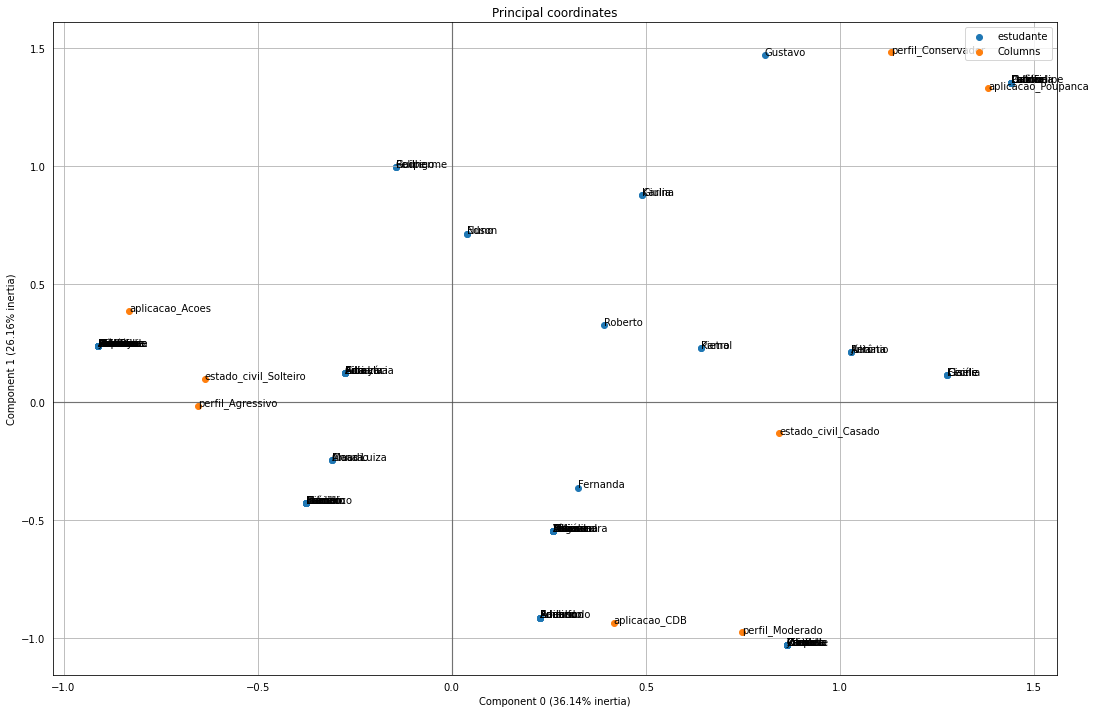

In [42]:
#Plot das coordenadas da Matriz Binária

#Criando tabela
IPT_binaria.plot_coordinates(matriz_binaria, figsize=(18,12))
plt.show()

**Note que várias observações são idênticas a outras, por isso a sobreposição de pontos**

## Usando matriz de Burt para plotar os dados

In [23]:
#Coordenadas da matriz de Burt (Coordenadas Principais)
coord = pd.DataFrame(IPT_Burt.column_coordinates(Matriz_Burt))
coord

,0,1,2,3,4
perfil_Agressivo,0.506836,-0.009728,-0.180351,0.068383,0.162661
perfil_Conservador,-0.876950,0.979621,-0.253179,-0.353630,-0.286543
perfil_Moderado,-0.579533,-0.643574,0.590576,0.081821,-0.182524
aplicacao_Acoes,0.645125,0.255874,0.030510,0.152018,-0.207069
aplicacao_CDB,-0.323769,-0.617469,-0.210750,-0.217305,0.069703
aplicacao_Poupanca,-1.071991,0.878963,0.470470,0.123424,0.435331
estado_civil_Casado,-0.654371,-0.086594,-0.284285,0.229709,-0.044894
estado_civil_Solteiro,0.493648,0.065326,0.214461,-0.173289,0.033867


**Coordenadas das variáveis usando a matriz de Burt**

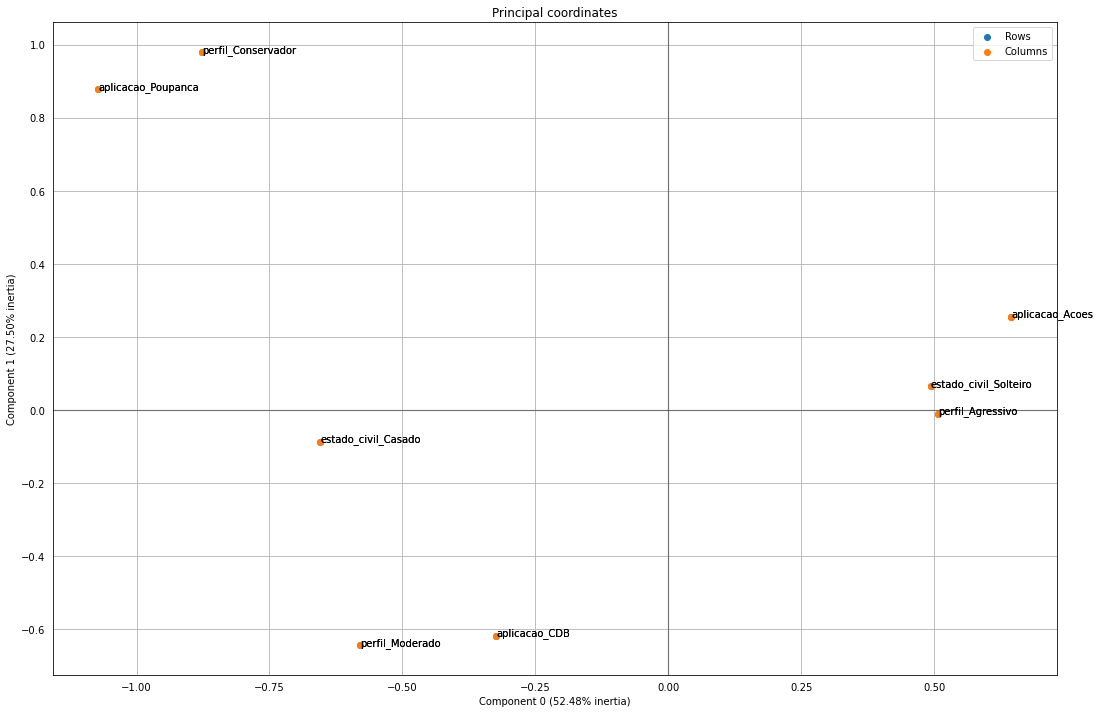

In [24]:
#Plot das coordenadas da Matriz de Burt

#Criando tabela
IPT_Burt.plot_coordinates(Matriz_Burt, figsize=(18,12))
plt.show()

**A matriz de burt captura uma maior porcentagem nas primeiras dimensões, além da escala dos dados ser menor**

# Conclusão:

**Na ACM usamos 3 ou mais variáveis para analise, com isso temos 2 opções de matrizes, a binaria que captura as coordenadas das observações e variáveis e temos a matriz de burt que captura melhor as coordenadas das variáveis, portanto depende do seu objetivo para escolher a melhor matriz, lembrando que as coordenadas além de conseguir fazer o mapa perceptual, serve como variáveis metricas sem cometer ponderação arbitraria** 